In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV as rsCV
import pickle

In [21]:
#Useful Functions for later

def ROC_curve(predictions1,predictions2,predictions3,labels):
    class0_incorrect_rate,class_0_correct_rate, thresholds =  roc_curve(labels, predictions1)
    class0_incorrect_rate2,class_0_correct_rate2, thresholds2 =  roc_curve(labels, predictions2)
    class0_incorrect_rate3,class_0_correct_rate3, thresholds3 =  roc_curve(labels, predictions3)
    AUC = auc(class0_incorrect_rate,class_0_correct_rate)
    AUC2 = auc(class0_incorrect_rate2,class_0_correct_rate2)
    AUC3 = auc(class0_incorrect_rate3,class_0_correct_rate3)

    
    #Initialize plot
    plt.figure(figsize=(2,2))
    plt.figure(facecolor="white")
    
    plt.plot([0, 1], [0, 1], 'k-',label='No Improvement')
    plt.plot(class0_incorrect_rate,class_0_correct_rate,color = 'red')
    plt.plot(class0_incorrect_rate2,class_0_correct_rate2,color = 'blue')
    plt.plot(class0_incorrect_rate3,class_0_correct_rate3,color = 'green')
        

    plt.ylabel('Class 1 True Positive rate')
    plt.xlabel('Class 1 False Positive rate')
    plt.xlim([-0.01,1.05])
    plt.ylim([0.9,1.005])
    plt.xticks(np.arange(0,1.05,0.1))
    plt.yticks(np.arange(0.9,1.005,0.025))
    plt.legend(['x = y',
                ' RF(100) (auc = %0.4f)'%AUC,
                ' rsRF (auc = %0.4f)'%AUC2,
                ' xgboost_rsRF (auc = %0.4f)'%AUC3], 
               loc='lower right')
    
    plt.grid()
    plt.savefig('ROC.png')
    return

In [10]:
#Load data
labels = np.load('Scripts\Simulations\labels_test.npy')
dataset =  np.load('Scripts\Simulations\y_test.npy')


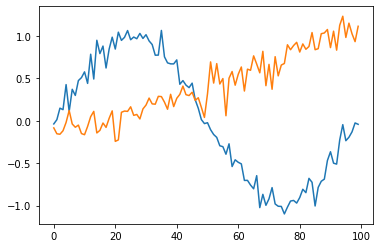

In [11]:
#Display data preproocess and display data

#plotting random dataset
plt.plot(dataset[150])
plt.plot(dataset[10])
plt.show()

#Remove Classes 2,3,4
lower_classes_indices = np.where(labels>1)
dataset = np.delete(dataset,lower_classes_indices,axis = 0)
labels = np.delete(labels,lower_classes_indices)

#Split Training and test Data

Train_data  =dataset[0:45000]
Train_labels = labels[0:45000]
Test_data = dataset[45000:49500]
Test_labels = labels[45000:49500]
#Displaying samples from the four possible classes


# Random Forest Classifier.

### A single Radom forest Classifier

In [30]:
#Initiallize a Randome forest

Randomforest = RandomForestClassifier(n_estimators=1000,
                                      criterion='gini',#Some Idea what this is
                                      max_depth=5,
                                      min_samples_split=100,
                                      min_samples_leaf=1,
                                      min_weight_fraction_leaf=0.0,
                                      max_features='auto', 
                                      max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      bootstrap=True, 
                                      oob_score=False,
                                      n_jobs=-1, 
                                      random_state=None,
                                      verbose=5,
                                      warm_start=False,
                                      class_weight=None, 
                                      ccp_alpha=0.0,
                                      max_samples=None)

In [ ]:
#Training and save models
model =  Randomforest.fit(Train_data,Train_labels)
pkl_filename = "rfc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [48]:
#load model
pkl_filename = "rfc.pkl"
#Load from file
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)
y_predict = model.predict(Test_data)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [50]:
#Evaluation/ Accuracy/Confusion matrix
y_predict = model.predict(Test_data)
print(confusion_matrix(Test_labels,y_predict))
model.score(Test_data,Test_labels)


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12

[[2223  108]
 [   1 2168]]


0.9757777777777777

## Hyperparameter Tunning/ Randomized Search

In [14]:
#Initialize the parameters to sample from as well as the grid search

n_estimators= [10,100,500,1000,5000]
max_depth = [4,6,8,12]
max_features = [0.05,0.1,0.3,0.6]

hparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
              }
#Estimator
rf = RandomForestClassifier(verbose = 5,n_jobs = -1)

#Initializing the randomizedSearchthingie
classifier = rsCV(estimator = rf, 
                  param_distributions = hparameters, 
                  n_iter = 10, # The number of random hypterparameter combinations to try.
                  cv = 3, 
                  verbose=100, 
                  random_state=42, 
                  n_jobs = -1)

In [ ]:
#Train and save model
classifier.fit(Train_data,Train_labels)

pkl_filename = "grid_rfc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)

In [54]:
#load model
pkl_filename = "grid_rfc.pkl"
with open(pkl_filename, 'rb') as file:
    model2 = pickle.load(file)
y2_predict = model2.predict(Test_data)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


In [55]:
#Evaluation/ Accuracy/Confusion matrix/Receiver operating curve

print(confusion_matrix(Test_labels,y2_predict))
print(model2.score(Test_data,Test_labels))


[[2271   60]
 [   3 2166]]
0.986


[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


# Gradient Boosted Decistion trees/Randomized Search

In [5]:
from xgboost import XGBClassifier as xgb

In [9]:
#Initializing the random grid search
n_estimators= [10,100,500,1000]
max_depth = [4,6,8,12]
max_features = [0.05,0.1,0.3,0.6]
learning_rate = [0.05,0.2,0.3]
gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ] #Some regularization thing
colsample_bytree =[ 0.3, 0.4, 0.5 , 0.7 ]
hparamters = {
         'n_estimators' :n_estimators,
         'learning_rate' : learning_rate,
         'max_depth' : max_depth,
         'gamma': gamma,
         'colsample_bytree' : colsample_bytree
        }

xgrf = xgb(verbosity = 1,n_jobs = 10)
classifier = rsCV(estimator = xgrf, 
                  param_distributions = hparamters, 
                  n_iter = 10, # The number of random hypterparameter combinations to try.
                  cv = 3, 
                  verbose=5, 
                  random_state=42, 
                  n_jobs = 10)

In [ ]:
#Train and save
classifier.fit(Train_data,Train_labels)
pkl_filename = "grid_xgrfc.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(classifier, file)
    

In [56]:
pkl_filename3 = "grid_xgrfc.pkl"
with open(pkl_filename3, 'rb') as file:
    model3 = pickle.load(file)
y3_predict = model3.predict(Test_data)

{'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.3}
[[2313   18]
 [   2 2167]]
0.9955555555555555


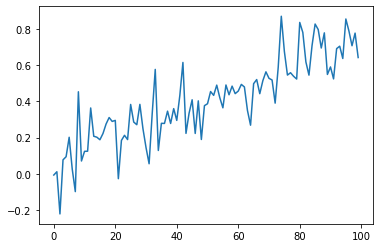

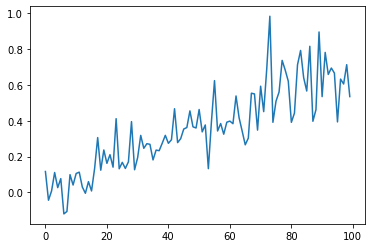

0.9955555555555555
2313 2167 18


In [66]:
#Performance and comparizon with older models

print(model3.best_params_)
xg_predict = model3.predict(Test_data)
print(confusion_matrix(Test_labels,xg_predict))
print(model3.score(Test_data,Test_labels))
count = 0
True_class0 = 0
False_class0 =0
True_class1 =0
for i in range(len(y3_predict)):
    if y3_predict[i] ==Test_labels[i]:
        count+=1
        if y3_predict[i]==0:
            True_class0 +=1
        else:
            True_class1 +=1
    else:
        if Test_labels[i]==0:
            False_class0 +=1
        else:
            plt.plot(Test_data[i])
            plt.show()
        
print(count/len(y3_predict))
print(True_class0,True_class1,False_class0)

In [ ]:
ROC_curve(y_predict,y2_predict,y3_predict,Test_labels)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


<Figure size 144x144 with 0 Axes>

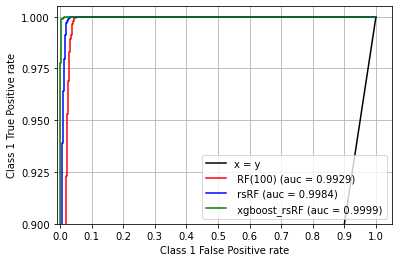

In [22]:

#Random Forest Model

pkl_filename = "rfc.pkl"
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)
y_predict = model.predict_proba(Test_data)[:,1]

#Randomized search model

pkl_filename2 = "grid_rfc.pkl"
with open(pkl_filename2, 'rb') as file:
    model2 = pickle.load(file)
y2_predict = model2.predict_proba(Test_data)[:,1]
#Boosted Model with Randomized search

pkl_filename3 = "grid_xgrfc.pkl"
with open(pkl_filename3, 'rb') as file:
    model3 = pickle.load(file)
y3_predict = model3.predict_proba(Test_data)[:,1]

ROC_curve(y_predict,y2_predict,y3_predict,Test_labels)

1.0 0.0


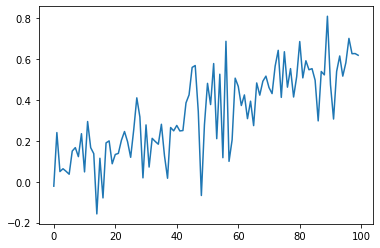

1.0 0.0


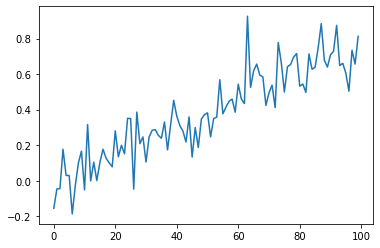

0.0 1.0


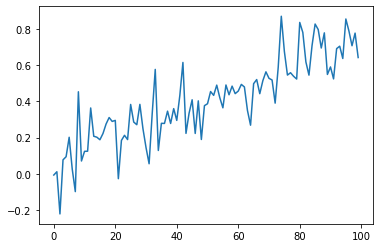

1.0 0.0


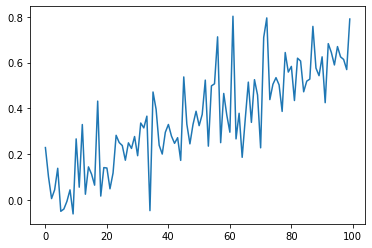

1.0 0.0


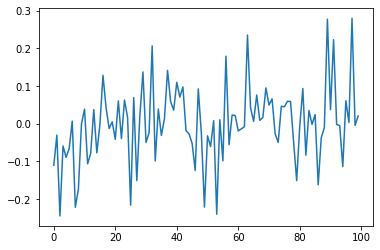

1.0 0.0


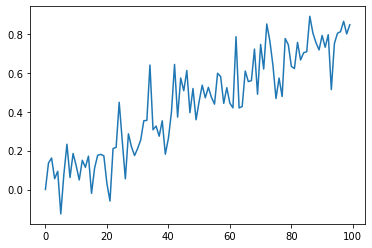

1.0 0.0


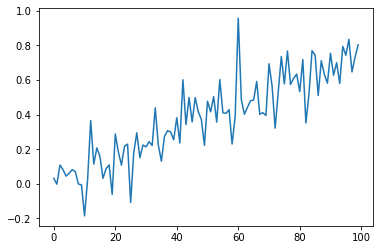

1.0 0.0


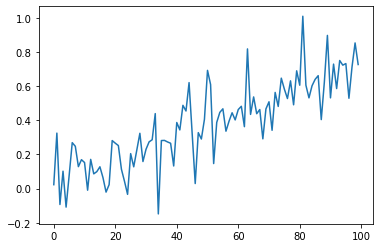

0.0 1.0


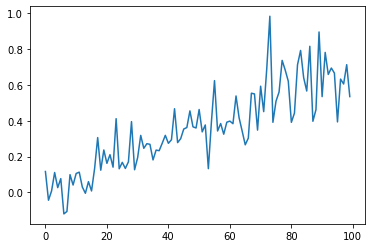

1.0 0.0


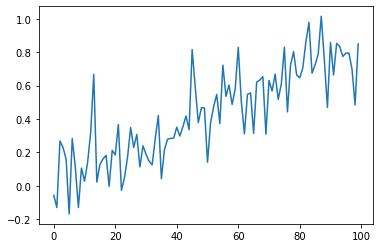

1.0 0.0


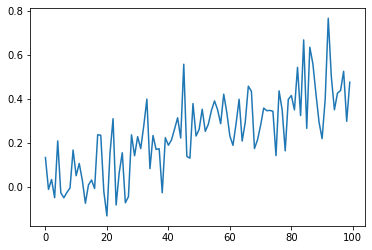

1.0 0.0


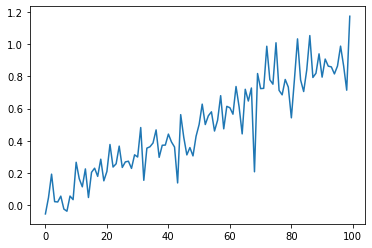

1.0 0.0


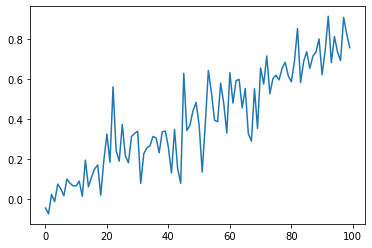

1.0 0.0


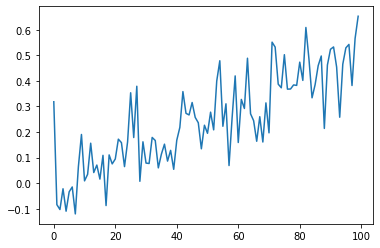

1.0 0.0


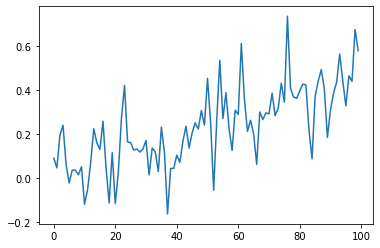

1.0 0.0


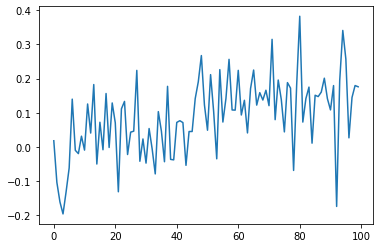

1.0 0.0


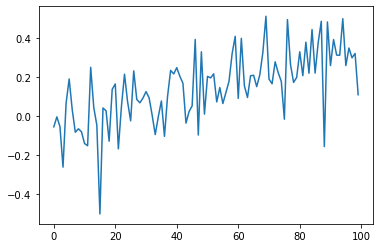

1.0 0.0


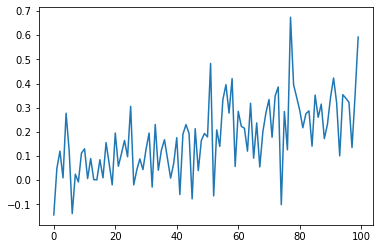

1.0 0.0


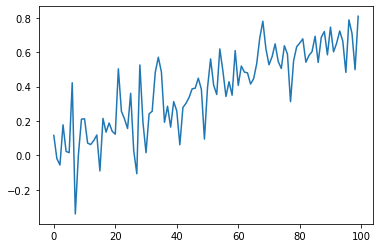

1.0 0.0


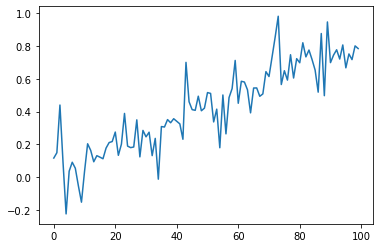

In [7]:
#Example fails

for i in range(len(y3_predict)):
    if y3_predict[i] !=Test_labels[i]:
        plt.plot(Test_data[i])
        print(y3_predict[i],Test_labels[i])
        plt.show()
